# connectLib Pipeline

## Algorithm

**Description:** The connectLib Pipeline filters out the background noise of an n-dimensional image and then segments the resulting image into groups of data type Cluster presented in list-form. 

**Inputs:** 
    1. the image to be segmented

**Outputs:**
    1. the list of clusters (data type: Cluster)
    
**Function**

In [ ]:
###Step 1: Threshold the image using Otsu Binarization 
    probVox = np.nan_to_num(argVox)
    bianVox = np.zeros_like(probVox)
    for zIndex, curSlice in enumerate(probVox):
        #if the array contains all the same values
        if np.max(curSlice) == np.min(curSlice):
            #otsu thresh will fail here, leave bianVox as all 0's
            continue
        thresh = threshold_otsu(curSlice)
        bianVox[zIndex] = curSlice > thresh
    return bianVox

###Step 2: segments the thresholded image into a list of clusters
    labelMap = label(voxel)
    clusterList = []
    #plus 1 since max label should be included
    for uniqueLabel in range(0, np.max(labelMap)+1):
        memberList = [list(elem) for elem in zip(*np.where(labelMap == uniqueLabel))]
        if not len(memberList) == 0:
            clusterList.append(Cluster(memberList))
    return clusterList

## Write Code
All code for the connectLib pipeline can be found in our connectLib.py file, located here:

https://github.com/NeuroDataDesign/pan-synapse/blob/master/code/functions/connectLib.py

## Simulation

### 1. Unit Testing ###
Unit tests were developed to validate the functionality and correctness of both functions within the connectLib Pipeline. These tests can be found here:

https://github.com/NeuroDataDesign/pan-synapse/tree/master/code/tests/connectLibTests.py


### 2. Functionality Testing

connectLib Pipeline Functionality Tests will be performed to demonstrate that the pipeline performs as expected under perfectly ideal and perfectly non-ideal circumstances. Data will be sampled from two synthetic sets, one with two 3x3x3 'synapse' clusters of intensity 100 within a 20x20x20 volume, and one of uniform data with value 100 within a 20x20x20 volume.

#### Success 
* we expect the connectLib pipeline to segment the 2-cluster image into two clusters

#### Failure 
* we expect the connectLib pipeline to fail to cluster the uniform data, as the data is not bimodal 

**1. Load Functionality Data**

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pickle
import sys
sys.path.insert(0,'../code/functions/')
import connectLib as cLib
import plosLib as pLib

twoClusterDat = pickle.load(open('../code/tests/synthDat/twoPerfectClusters.synth'))
all100Dat = pickle.load(open('../code/tests/synthDat/all100.synth'))

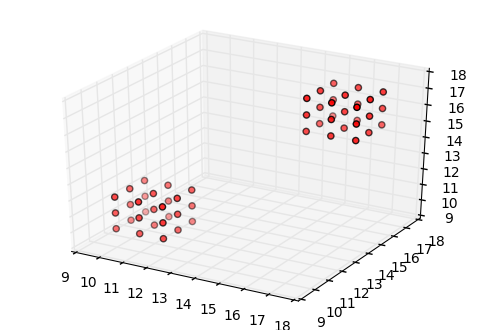

In [3]:
#The two cluster data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
z, y, x = twoClusterDat.nonzero()
ax.scatter(x, y, z, zdir='z', c='r')
plt.show()

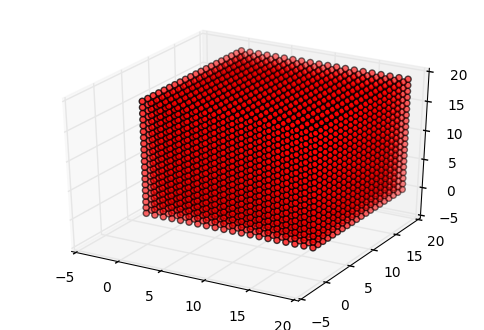

In [5]:
#The uniform data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
z, y, x = all100Dat.nonzero()
ax.scatter(x, y, z, zdir='z', c='r')
plt.show()

**2. Generate Functionality Results**

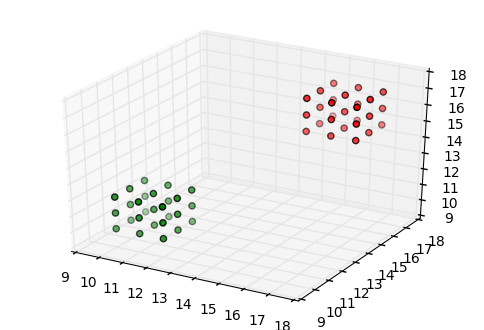

In [63]:
#thresholds the two-cluster data using Otsu's Binarization
thresh = cLib.otsuVox(twoClusterDat)
connect = connectedComponents(thresh)

#the image for the first cluster
displayCluster1 = np.zeros_like(twoClusterDat)
for i in range(len(connect[2].members)):
    displayCluster1[connect[2].members[i][0]][connect[2].members[i][1]][connect[2].members[i][2]] = 1
    
#the image for the second cluster    
displayCluster2 = np.zeros_like(twoClusterDat)
for i in range(len(connect[1].members)):
    displayCluster2[connect[1].members[i][0]][connect[1].members[i][1]][connect[1].members[i][2]] = 2

#displayin these images in different colors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
z1, y1, x1 = displayCluster1.nonzero()
z2, y2, x2 = displayCluster2.nonzero()
ax.scatter(x1, y1, z1, zdir='z', c='r')
ax.scatter(x2, y2, z2, zdir='z', c='g')
plt.show()

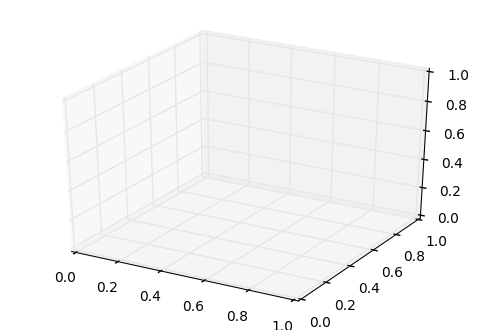

In [62]:
#thresholds the two-cluster data using Otsu's Binarization
thresh = cLib.otsuVox(all100Dat)
connect = connectedComponents(thresh)

#the image of the connected components
displayCluster = np.zeros_like(twoClusterDat)
for cluster in range(len(connect)):
    for i in range(len(connect[cluster].members)):
        displayCluster1[connect[cluster].members[i][0]][connect[cluster].members[i][1]][connect[cluster].members[i][2]] = 1
    
    
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
z, y, x = displayCluster.nonzero()
ax.scatter(x, y, z, zdir='z', c='r')
plt.show()

**3. Analyze Functionality Results**
The results are consistent with the hypothesis. The data performed well on an image that contains distinct, disparate clusters, and poorly on an image that is uniform and does not contain any clusters. 

## 3. Validation Testing
**1. Displaying raw data**

Validation testing will be performed on a a 100x100x100 volume with a pixel intensity distribution approximately the same as that of the true image volumes (i.e., 98% noise, 2% synapse). The synapse pixels will be grouped together in clusters as they would in the true data. Based on research into the true size of synapses, these synthetic synapse clusters will be given area of ~.2 microns ^3, or about 27 voxels (assuming the synthetic data here and the real world data have identical resolutions). After the data goes through the pipeLine, I will gauge performance based on the following:

1. volumetric percentage of data (should be 2% of the data)
2. average volume of synapses (should be 27 voxels) 
3. background percentage of data (should be 0%)

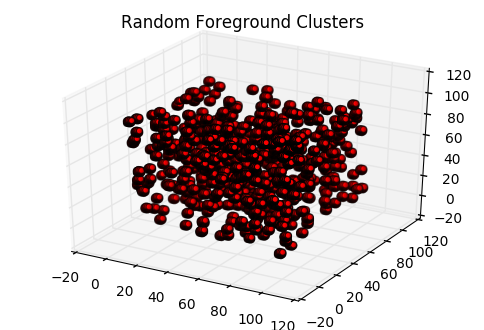

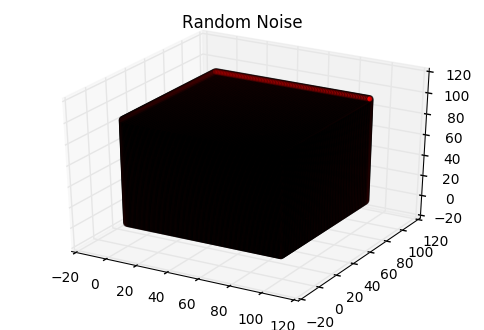

In [3]:
randIm = pickle.load(open('../code/tests/synthDat/randomClusters.synth'))
foreground = randIm[0]
noise = randIm[1]

#displaying the random clusters
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
z, y, x = foreground.nonzero()
ax.scatter(x, y, z, zdir='z', c='r')
plt.title('Random Foreground Clusters')
plt.show()

#displaying the noise
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
z, y, x = noise.nonzero()
ax.scatter(x, y, z, zdir='z', c='r')
plt.title('Random Noise')
plt.show()

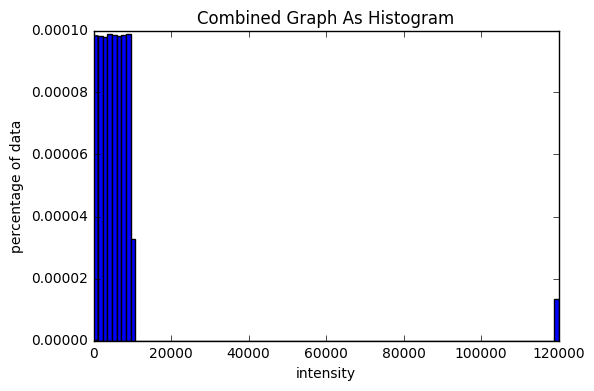

In [28]:
import mouseVis 
randIm = pickle.load(open('../code/tests/synthDat/randomClusters.synth'))
foreground = randIm[0]
noise = randIm[1]
combinedIm = foreground + noise
mouseVis.generateHist(combinedIm, bins = 100, title = 'Combined Graph As Histogram', xaxis = "intensity", yaxis = "percentage of data")

**2. Predicting Performance**
Looking at the data, there seem to be many large distinct clusters, as well as a good amount of background noise. It is also clearly bimodal. This leads me to believe that the the connectLib pipeline will filter out the background noise and effectively group the foreground clusters effectively. 

**3. Generate Performance** 

In [46]:
filtCombinedIm = cLib.otsuVox(pLib.pipeline(combinedIm))
connectedIm = cLib.connectedComponents(filtCombinedIm)
del connectedIm[0]

totalVol = 0 
for cluster in (range(len(connectedIm))):
    totalVol += connectedIm[cluster].getVolume()
    
avgVol = totalVol*1.0/len(connectedIm)

print 'Test1: Avg Volume'
print "\tExpected: 27" + '\tActual: ' + str(avgVol)

print 'Test2: Cluster Proportion of Data By Volume'
print "\tExpected: .02" + '\tActual: ' + str(totalVol/(100*100*100.0))

Test1: Avg Volume
	Expected: 27	Actual: 2.35738831615
Test2: Cluster Proportion of Data By Volume
	Expected: .02	Actual: 0.001372


**3. Document performance accuracy relative to predictions**
As predicted, the larger clusters were semgented very well, while the smaller, grouped clusters were segmented into groups rather than individually. The background was also segmented into a grid. In the future, an algorithm that allows segmentation with non-restrictive segmentation size would improve performance, as it could group the entire background into one segment, and segment each small cluster individually rather than group them together as to equalize the size of the segments. An algorithm that has a 3-dimensional implimentation would also be more 